In [ ]:
from tensorflow import keras
import tensorflow as tf
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator()

In [ ]:
import os
import cv2

In [ ]:
source_folder = '/content/drive/MyDrive/final_year_project/Fruits'
destination_folder = '/content/drive/MyDrive/final_year_project/Fruits_resized'

# Ensure the destination folder exists
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

In [ ]:
for class_folder in os.listdir(source_folder):
    class_path = os.path.join(source_folder, class_folder)

    # Ensure it's a directory
    if os.path.isdir(class_path):
        # Loop through each file in the class folder
        for file_name in os.listdir(class_path):
            # Read the image
            image = cv2.imread(os.path.join(class_path, file_name))

            # Resize the image to 256x256
            resized_image = cv2.resize(image, (256, 256))

            # Save the resized image to the destination folder
            destination_class_folder = os.path.join(destination_folder, class_folder)
            if not os.path.exists(destination_class_folder):
                os.makedirs(destination_class_folder)
            cv2.imwrite(os.path.join(destination_class_folder, file_name), resized_image)

print("Images resized and saved successfully!")

Images resized and saved successfully!


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
import random
random.seed(42)

In [ ]:
source_folder = '/content/drive/MyDrive/final_year_project/Fruits_resized'

# Destination folders for train, test, and validation sets
train_folder = '/content/drive/MyDrive/final_year_project/train_resized_data'
test_folder = '/content/drive/MyDrive/final_year_project/test_resized_data'
val_folder = '/content/drive/MyDrive/final_year_project/validation_resized_data'

In [ ]:
for folder in [train_folder, test_folder, val_folder]:
    if not os.path.exists(folder):
      os.makedirs(folder)

In [ ]:
classes = os.listdir(source_folder)
for class_name in classes:
    class_path = os.path.join(source_folder, class_name)
    images = os.listdir(class_path)
    random.shuffle(images)
    train_images, test_val_images = train_test_split(images, test_size=0.2, random_state=42)
    test_images, val_images = train_test_split(test_val_images, test_size=0.5, random_state=42)
    for image in train_images:
        src_path = os.path.join(class_path, image)
        dest_path = os.path.join(train_folder, class_name, image)
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.copy(src_path, dest_path)

    for image in test_images:
        src_path = os.path.join(class_path, image)
        dest_path = os.path.join(test_folder, class_name, image)
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.copy(src_path, dest_path)

    for image in val_images:
        src_path = os.path.join(class_path, image)
        dest_path = os.path.join(val_folder, class_name, image)
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.copy(src_path, dest_path)

print("Images split into train, test, and validation sets successfully!")

Images split into train, test, and validation sets successfully!


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train = datagen.flow_from_directory('/content/drive/MyDrive/final_year_project/train_resized_data',class_mode='categorical',batch_size=32,target_size=(256,256))
test = datagen.flow_from_directory('/content/drive/MyDrive/final_year_project/test_resized_data',class_mode='categorical',batch_size=32,target_size=(256,256))
valid = datagen.flow_from_directory('/content/drive/MyDrive/final_year_project/validation_resized_data',class_mode='categorical',batch_size=32,target_size=(256,256))

Found 5031 images belonging to 6 classes.
Found 628 images belonging to 6 classes.
Found 632 images belonging to 6 classes.


In [1]:
x_train,xt=train.next()
print('Batch shape=',x_train.shape,'min=',x_train.min(),'max=',x_train.max())

NameError: name 'train' is not defined

In [ ]:
classes=["apple","banana","guava","lime","orange","pomegranete"]

In [ ]:
from keras.optimizers import Adam


In [ ]:
learning_rate = 0.000001  # Adjust this value as needed

# Create Adam optimizer with custom learning rate
optimizer = Adam(learning_rate=learning_rate)

In [ ]:
model=keras.models.Sequential([
    #1
    keras.layers.Conv2D(filters=90,kernel_size=(5,5),strides=(2,2),activation='relu',input_shape=(256,256,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    #2
    keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    #3

    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    keras.layers.Flatten(),
    #6
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dropout(0.5),


    keras.layers.Dense(6,activation='softmax')

])
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 90)      6840      
                                                                 
 batch_normalization (Batch  (None, 126, 126, 90)      360       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 90)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 256)       207616    
                                                                 
 batch_normalization_1 (Bat  (None, 63, 63, 256)       1024      
 chNormalization)                                                
                                                        

In [ ]:
history=model.fit(train,epochs=10,validation_data=valid)

Epoch 1/10
158/158 [==============================] - 52s 244ms/step - loss: 2.1519 - accuracy: 0.4065 - val_loss: 1.8479 - val_accuracy: 0.2310
Epoch 2/10
158/158 [==============================] - 38s 237ms/step - loss: 1.0948 - accuracy: 0.6462 - val_loss: 1.5843 - val_accuracy: 0.3861
Epoch 3/10
158/158 [==============================] - 37s 232ms/step - loss: 0.7148 - accuracy: 0.7601 - val_loss: 0.8842 - val_accuracy: 0.7611
Epoch 4/10
158/158 [==============================] - 37s 231ms/step - loss: 0.5080 - accuracy: 0.8306 - val_loss: 0.2974 - val_accuracy: 0.9225
Epoch 5/10
158/158 [==============================] - 36s 226ms/step - loss: 0.4049 - accuracy: 0.8666 - val_loss: 0.1284 - val_accuracy: 0.9778
Epoch 6/10
158/158 [==============================] - 37s 235ms/step - loss: 0.2983 - accuracy: 0.9016 - val_loss: 0.0814 - val_accuracy: 0.9873
Epoch 7/10
158/158 [==============================] - 36s 226ms/step - loss: 0.2510 - accuracy: 0.9157 - val_loss: 0.0655 - val_ac

In [ ]:
model.save('/content/drive/MyDrive/final_year_project/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.evaluate(test)

20/20 [==============================] - 5s 224ms/step - loss: 0.0491 - accuracy: 0.9857


[0.04909871891140938, 0.9856687784194946]

In [ ]:
import numpy as np
from keras.preprocessing import image

# Load the image
img_path = '/content/drive/MyDrive/final_year_project/test_resized_data/Apple/Apple (1000).png'  # Replace 'path_to_your_image.jpg' with the path to your image
img = image.load_img(img_path, target_size=(256, 256))  # Load the image and resize it to match the input shape (256x256)

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

img_array = img_array / 255.0
predictions = model.predict(img_array)

predicted_class_index = np.argmax(predictions)
print(classes[predicted_class_index])

1/1 [==============================] - 1s 723ms/step
apple


In [ ]:
import numpy as np
from keras.preprocessing import image

# Load the image
img_path = '/content/drive/MyDrive/final_year_project/test_resized_data/Guava/Guava (100).png'  # Replace 'path_to_your_image.jpg' with the path to your image
img = image.load_img(img_path, target_size=(256, 256))  # Load the image and resize it to match the input shape (256x256)

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

img_array = img_array / 255.0
predictions = model.predict(img_array)

predicted_class_index = np.argmax(predictions)
print(classes[predicted_class_index])

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/final_year_project/test_resized_data/Guava/Guava (100).png'

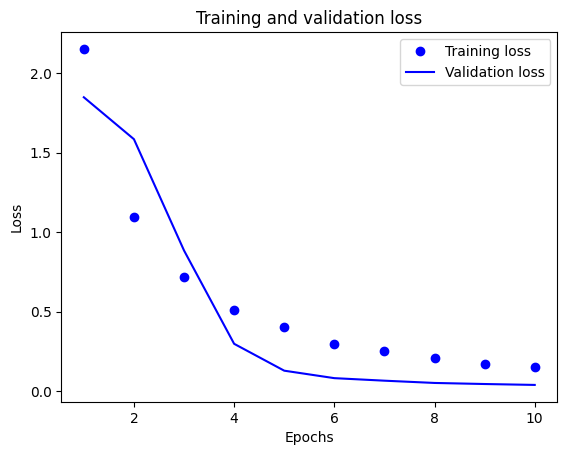

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot model loss vs. epoch
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/final_year_project/loss_plot.png')
plt.show()